In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
#from keras.layers import Add,concatenate, merge
#from keras.engine import Input, Model
from sklearn.model_selection import train_test_split

In [9]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd 'drive/My Drive/ECE 657/Part-2/'

[Errno 2] No such file or directory: 'drive/My Drive/ECE 657/Part-2/'
/content/drive/My Drive/ECE 657/Part-2


In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('testX.csv')
train.describe()

,Id,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,39999.500000,2.002933,0.000483,0.006067,0.033700,0.090450,0.241383,0.392517,0.777333,2.158300,5.597000,14.485433,32.866333,45.783900,51.985883,50.779350,50.425750,53.686350,51.371150,40.467633,25.962700,10.281083,4.034833,1.929250,1.148100,0.842217,0.47675,0.262000,0.08960,0.015167,0.004783,0.020917,0.102850,0.339433,0.741917,2.058883,7.226483,17.394200,32.014417,53.019567,...,92.459967,90.458233,79.041600,62.473383,46.021650,44.367617,47.964333,38.793683,22.335200,9.189950,3.814733,0.622083,0.024617,0.220950,1.03375,4.379250,12.673967,21.02115,21.219867,17.159950,22.219717,30.688333,41.950650,51.574867,52.491717,46.289000,42.470617,45.183467,50.020433,46.359133,34.545900,23.297883,16.652150,17.953617,22.969333,17.967350,8.525333,2.753883,0.832950,0.072850
std,17320.652413,1.415000,0.061507,0.292286,1.178115,2.306445,4.365543,5.702057,8.023953,13.942884,23.572943,38.252977,57.692077,65.947637,68.565341,67.919718,67.397257,69.421676,67.915419,62.725940,51.620728,32.300648,20.015361,13.871987,10.593331,9.214058,7.01254,5.295104,2.78752,1.048501,0.361104,1.133843,3.104964,6.149413,9.589874,15.716790,29.936239,47.877737,65.585449,82.247678,...,100.881732,99.700169,95.036194,88.766993,78.686045,77.236284,83.267721,74.407819,55.982185,37.736031,24.425300,8.175978,1.009238,4.416291,10.07838,20.894199,37.020302,49.07243,48.312498,42.208942,48.438714,55.116266,62.242895,68.555227,69.759801,67.367902,66.182219,66.754477,68.685723,66.060666,57.569109,48.952580,42.147395,43.985951,51.856475,45.225807,29.529071,17.396211,9.263115,2.131444
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.

In [12]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [13]:
batch_size = 1024
num_classes = 5
epochs = 300
img_rows, img_cols = 28, 28

x_train = train.drop(['Label', 'Id'], axis=1).to_numpy()
y_train = train['Label'].to_numpy()
x_test = test.drop(['Id'], axis = 1).to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes)

print(x_val.shape)
print(y_val)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_val /= 255

(6000, 28, 28, 1)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


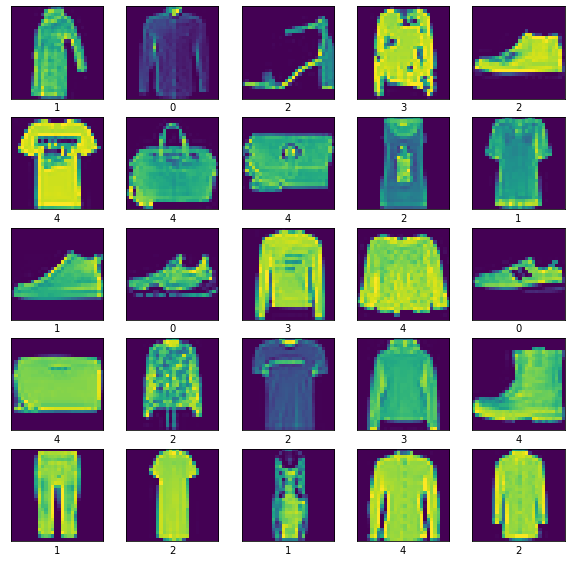

In [14]:
plt.figure(figsize=(10,20))
for i in range(25):
  plt.subplot(10, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].reshape(28,28))
  plt.xlabel(y_train[i].argmax(axis = -1))
plt.show()

In [15]:
print(x_train.shape)
print(y_train.shape)

(54000, 28, 28, 1)
(54000, 5)


In [16]:
#CNN with sgd

model_sgd = Sequential()
model_sgd.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same', input_shape = input_shape))
model_sgd.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same'))

model_sgd.add(MaxPooling2D(pool_size=(2,2), strides=1))

model_sgd.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same'))
model_sgd.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same'))

model_sgd.add(MaxPooling2D(pool_size=(2,2), strides=1))

model_sgd.add(GlobalAveragePooling2D())
model_sgd.add(Dense(1024, activation='relu'))
model_sgd.add(Dropout(0.25))
model_sgd.add(Dense(256, activation='relu'))
model_sgd.add(Dropout(0.25))
model_sgd.add(Dense(num_classes, activation='softmax'))

model_sgd.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr=0.01), metrics = ['accuracy'])

#model_sgd.summary()

history = model_sgd.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

Epoch 1/300
53/53 [==============================] - 4s 75ms/step - loss: 1.6088 - accuracy: 0.2042 - val_loss: 1.6082 - val_accuracy: 0.1882
Epoch 2/300
53/53 [==============================] - 3s 62ms/step - loss: 1.6079 - accuracy: 0.2342 - val_loss: 1.6070 - val_accuracy: 0.2638
Epoch 3/300
53/53 [==============================] - 3s 62ms/step - loss: 1.6065 - accuracy: 0.2754 - val_loss: 1.6056 - val_accuracy: 0.3213
Epoch 4/300
53/53 [==============================] - 3s 62ms/step - loss: 1.6049 - accuracy: 0.2991 - val_loss: 1.6036 - val_accuracy: 0.3520
Epoch 5/300
53/53 [==============================] - 3s 62ms/step - loss: 1.6027 - accuracy: 0.3066 - val_loss: 1.6010 - val_accuracy: 0.3660
Epoch 6/300
53/53 [==============================] - 3s 62ms/step - loss: 1.5996 - accuracy: 0.3219 - val_loss: 1.5970 - val_accuracy: 0.3883
Epoch 7/300
53/53 [==============================] - 3s 62ms/step - loss: 1.5950 - accuracy: 0.3247 - val_loss: 1.5907 - val_accuracy: 0.3790
Epoch 

In [17]:
#CNN with RMSprop

model_rms = Sequential()
model_rms.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same', input_shape = input_shape))
model_rms.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding = 'same'))

model_rms.add(MaxPooling2D(pool_size=(2,2), strides=1))

model_rms.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same'))
model_rms.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding = 'same'))

model_rms.add(MaxPooling2D(pool_size=(2,2), strides=1))

model_rms.add(GlobalAveragePooling2D())
model_rms.add(Dense(1024, activation='relu'))
model_rms.add(Dropout(0.25))
model_rms.add(Dense(256, activation='relu'))
model_rms.add(Dropout(0.25))
model_rms.add(Dense(num_classes, activation='softmax'))

model_rms.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

#model_rms.summary()

history_rms = model_rms.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_val, y_val))

Epoch 1/300
53/53 [==============================] - 3s 64ms/step - loss: 1.4512 - accuracy: 0.3307 - val_loss: 1.2472 - val_accuracy: 0.3678
Epoch 2/300
53/53 [==============================] - 3s 63ms/step - loss: 1.2507 - accuracy: 0.4113 - val_loss: 1.3486 - val_accuracy: 0.3728
Epoch 3/300
53/53 [==============================] - 3s 62ms/step - loss: 1.1400 - accuracy: 0.4793 - val_loss: 1.2865 - val_accuracy: 0.4045
Epoch 4/300
53/53 [==============================] - 3s 63ms/step - loss: 1.0495 - accuracy: 0.5307 - val_loss: 1.0019 - val_accuracy: 0.5463
Epoch 5/300
53/53 [==============================] - 3s 63ms/step - loss: 0.9866 - accuracy: 0.5678 - val_loss: 0.8778 - val_accuracy: 0.6322
Epoch 6/300
53/53 [==============================] - 3s 63ms/step - loss: 0.9021 - accuracy: 0.6044 - val_loss: 0.9219 - val_accuracy: 0.5728
Epoch 7/300
53/53 [==============================] - 3s 63ms/step - loss: 0.8657 - accuracy: 0.6233 - val_loss: 0.8234 - val_accuracy: 0.6398
Epoch 

In [18]:
import time
start = time.time()
score = model_sgd.evaluate(x_val, y_val, verbose = 0)
end = time.time()
print("Time taken for testing data: ", end-start)
print("Validation Accuracy: ", score)

Time taken for testing data:  0.4533519744873047
Validation Accuracy:  [0.529087245464325, 0.7923333048820496]


In [19]:
import time
start = time.time()
score = model_rms.evaluate(x_val, y_val, verbose = 0)
end = time.time()
print("Time taken for testing data: ", end-start)
print("Validation Accuracy: ", score)

Time taken for testing data:  0.4260075092315674
Validation Accuracy:  [0.43122556805610657, 0.8976666927337646]


In [20]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# predict probabilities for test set
yhat_probs = model_sgd.predict(x_val, verbose=0)

yhat_classes = yhat_probs.argmax(axis=-1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_val.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)

matrix = multilabel_confusion_matrix(y_val.argmax(axis=-1), yhat_classes, labels = [0,1,2,3,4])
print(matrix)

#Reference:
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

Accuracy: 0.792333
Precision: 0.792333
Recall: 0.792333
F1 score: 0.792333
Cohens kappa: 0.740345
ROC AUC: 0.960578
[[[4741   69]
  [ 176 1014]]

 [[4420  350]
  [ 243  987]]

 [[4471  347]
  [ 362  820]]

 [[4530  295]
  [ 306  869]]

 [[4592  185]
  [ 159 1064]]]


In [21]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

# predict probabilities for test set
yhat_probs = model_rms.predict(x_val, verbose=0)

yhat_classes = yhat_probs.argmax(axis=-1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_val.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val.argmax(axis=-1), yhat_classes, average = 'micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_val.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)

matrix = multilabel_confusion_matrix(y_val.argmax(axis=-1), yhat_classes, labels = [0,1,2,3,4])
print(matrix)

#Reference:
#https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

Accuracy: 0.897667
Precision: 0.897667
Recall: 0.897667
F1 score: 0.897667
Cohens kappa: 0.872065
ROC AUC: 0.986348
[[[4743   67]
  [  57 1133]]

 [[4599  171]
  [ 139 1091]]

 [[4650  168]
  [ 177 1005]]

 [[4686  139]
  [ 168 1007]]

 [[4708   69]
  [  73 1150]]]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


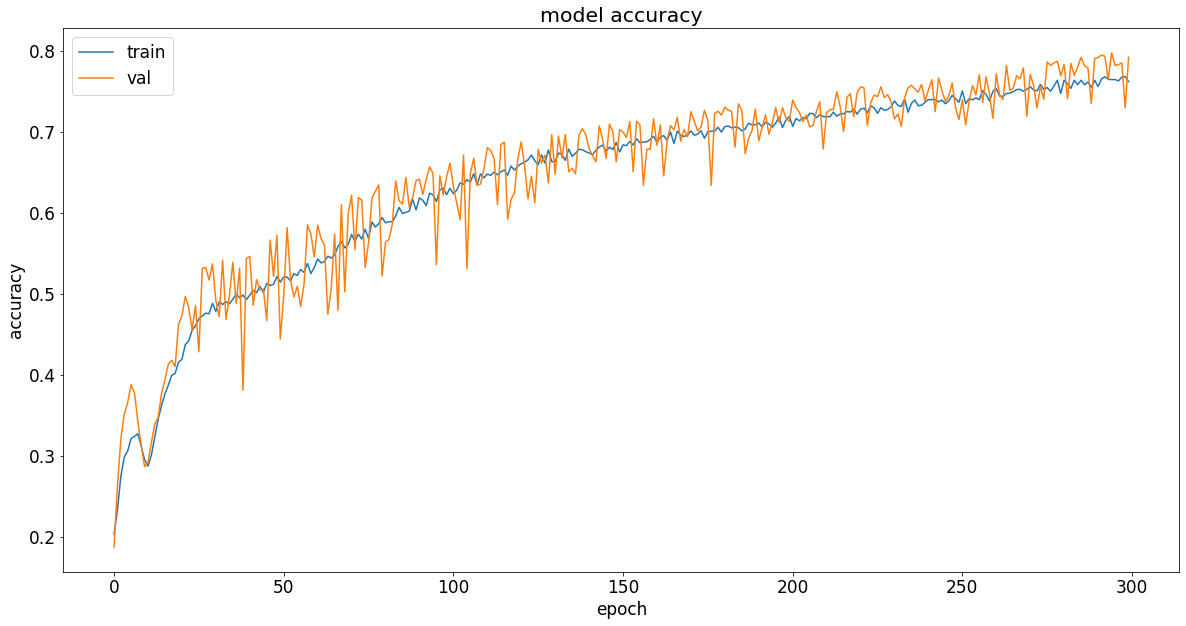

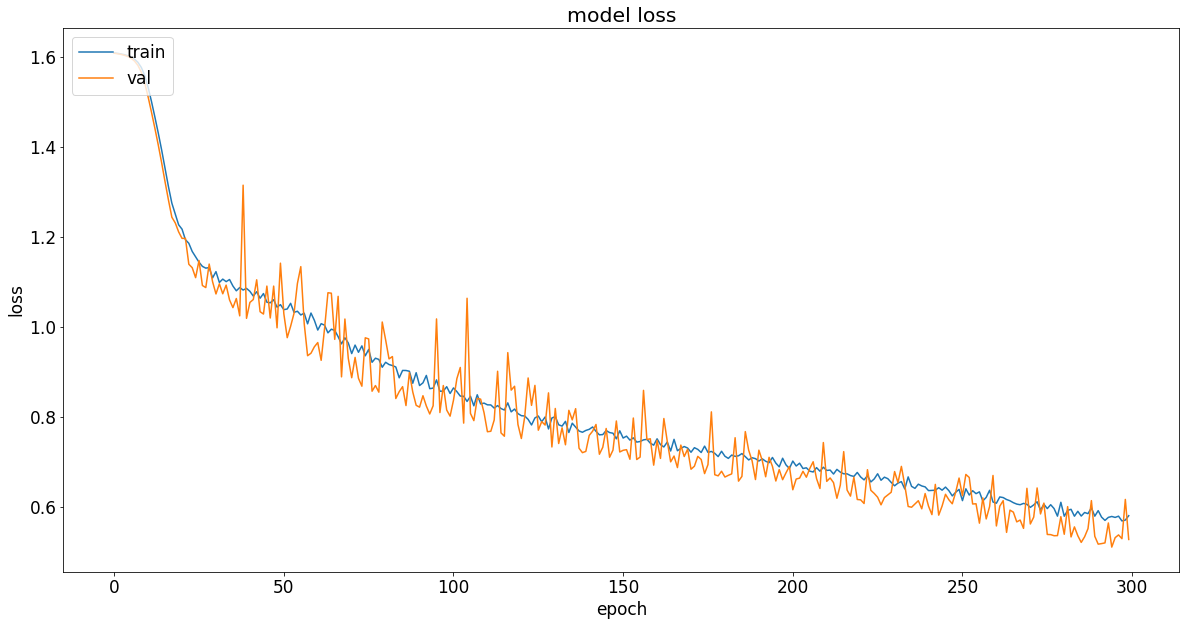

In [23]:
import matplotlib.pyplot as plt
#plt.rcParams['xtick.labelsize'] = 17
#plt.rcParams['ytick.labelsize'] = 17
#plt.rcParams['xlabel.fontsize'] = 17
plt.rcParams['font.size'] = 17
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()